In [1]:
import glob
from scipy import misc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
%matplotlib inline
%load_ext watermark
%watermark -v -p numpy,tensorflow

CPython 3.5.4
IPython 6.1.0

numpy 1.13.3
tensorflow 1.4.0


각 노래의 감성 분류 결과를 hardAnnotations.txt에서 읽어 들입니다. 이 파일의 내용은 노래마다 한 줄씩 데이터가 적재되어 있습니다. 맨 앞의 36개 컬럼의 값이 감성 분류에 해당합니다.(vocab.txt 참조)

18개의 감성 분류가 Emotion-..과 Not-Emotion-..으로 나뉘어져 있습니다. 즉,

* Emotion-Angry_/_Agressive
* NOT-Emotion-Angry_/_Agressive

와 같습니다. 문제를 간단하게 하기 위해 음성 클래스 격인 Not-...을 제외한 18개의 컬럼만 사용합니다.

In [2]:
anno = pd.read_csv('CAL500_noAudioFeatures/hardAnnotations.txt', header=None)

In [3]:
anno = anno.loc[:, 0:35]
anno = anno.loc[:, ::2]
anno

,0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34
0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1
1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1


각 노래에 맞는 anno을 할당하기 위해 전체 노래 목록을 읽습니다.

In [4]:
songNames = []
with open('CAL500_noAudioFeatures/songNames.txt') as f:
    for line in f.readlines():
        songNames.append(line.rstrip())

In [5]:
x_data = []
y_data = []
for fname in glob.glob('CAL500_png/*.png'):
    specgram = misc.imread(fname) # pillow 라이브러리가 설치되어 있어야 합니다.
    specgram = misc.imresize(specgram, .5)  # 480x640 --> 240x320
    if fname.find('jade_leary-going_in') > -1: # jade_leary-going_in은 스펙토그램을 만들 수 없어 제외합니다
        continue
    # 파일 이름(fname)이 songNames 중에 없을 수 있습니다.
    try:
        idx = songNames.index(fname.replace('CAL500_png/','').replace('.png',''))
        y_data.append(anno.loc[idx].values)
    except:
        continue
    x_data.append(specgram[:,:,:3]) # 알파 채널은 제외합니다.

X = np.array(x_data).astype(np.float32)
Y = np.array(y_data).astype(np.float32)
X.shape, Y.shape

((497, 240, 320, 3), (497, 18))

총 497개 데이터를 훈련(317개), 검증(80개), 테스트(100개) 세트로 나눕니다.

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((397, 240, 320, 3), (100, 240, 320, 3), (397, 18), (100, 18))

In [7]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)
X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape

((317, 240, 320, 3),
 (80, 240, 320, 3),
 (100, 240, 320, 3),
 (317, 18),
 (80, 18),
 (100, 18))

240x320x3 크기의 이미지 데이터와 18개의 레이블 데이터를 훈련시 주입하기 위해 플레이스 홀더를 만듭니다.

In [8]:
x = tf.placeholder("float", shape=[None, 240, 320, 3])
y = tf.placeholder("float", shape=[None, 18])

첫 번째 콘볼루션 레이어는 3x3 크기의 커널을 20개 사용합니다. 활성화 함수로는 렐루 함수를 사용합니다. 풀링은 3x3 크기의 맥스풀링을 사용합니다.

In [9]:
conv_1 = tf.nn.relu(tf.layers.conv2d(x, 20, (3,3)))
pool_1 = tf.layers.max_pooling2d(conv_1, (3,3), (3,3))
pool_1.get_shape()

TensorShape([Dimension(None), Dimension(79), Dimension(106), Dimension(20)])

두 번째 콘볼루션 레이어는 3x3 크기의 커널을 10개 사용합니다. 활성화 함수로는 렐루 함수를 사용합니다. 풀링은 3x3 크기의 맥스풀링을 사용합니다. 두 번째 풀링 레이어를 거치고 나면 특성 맵은 25x34x10의 텐서가 됩니다.

In [10]:
conv_2 = tf.nn.relu(tf.layers.conv2d(pool_1, 10, (3,3)))
pool_2 = tf.layers.max_pooling2d(conv_2, (3,3), (3,3))
pool_2.get_shape()

TensorShape([Dimension(None), Dimension(25), Dimension(34), Dimension(10)])

마지막으로 1000개의 완전 연결 레이어를 통과시켜 200개의 뉴런이 있는 마지막 레이어로 보냅니다.

In [11]:
dense_1 = tf.layers.dense(tf.reshape(pool_2, [-1, 25*34*10]), 1000, activation=tf.nn.relu)
dense_1.get_shape()

TensorShape([Dimension(None), Dimension(1000)])

200개의 뉴런이 있는 완전 연결 레이어에서 출력 레이어로 보냅니다.

In [12]:
dense_2 = tf.layers.dense(dense_1, 200, activation=tf.nn.relu)
dense_2.get_shape()

TensorShape([Dimension(None), Dimension(200)])

출력 레이어에서 나온 값이 y_hat이고 레이블이 여러개인 정답(y)와 비교해야 하므로 시그모이드 함수를 통과시켜 예측값(pred)를 만듭니다.

In [13]:
y_hat = tf.layers.dense(dense_2, 18)
pred = tf.nn.sigmoid(y_hat)
y_hat.get_shape()

TensorShape([Dimension(None), Dimension(18)])

다중 출력 문제에 맞게 손실 함수는 시그모이드 크로스 엔트로피를 사용합니다. Adam 최적화를 사용하고 학습률을 0.01로 합니다.

In [14]:
loss = tf.losses.sigmoid_cross_entropy(y, y_hat)
opti = tf.train.AdamOptimizer(0.01)
train = opti.minimize(loss)

타깃(y)와 예측(pred)를 logical_and로 비교하여 같은 위치에 1의 값이 있는 경우 True, 아닐 경우 False로 기록합니다. 그런 후 reduce_any 함수를 사용하여 18개의 감성 중 하나라도 True가 있는 경우는 해당 데이터를 True로 그렇지 않은 경우 False로 만듭니다. 각 데이터 마다 True/False로 된 것을 cast 함수를 사용하여 1/0으로 바꾼 후 reduce_mean으로 1의 값을 더해 평균을 냅니다.

In [15]:
y_equal = tf.logical_and(tf.cast(y, tf.bool), tf.cast(pred, tf.bool))
accuracy = tf.reduce_mean(tf.cast(tf.reduce_any(y_equal, axis=1), tf.float64))

In [16]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

10번 학습하는 동안 검증 세트로 정확도를 출력합니다.

In [17]:
costs = []
for i in range(10):
    _, cost = sess.run([train, loss], feed_dict={x: X_train, y: Y_train})
    val_accuracy = sess.run([accuracy], feed_dict={x: X_val, y: Y_val})
    print(cost, val_accuracy)
    costs.append(cost)

11.5984 [0.77500000000000002]
1012.66 [0.41249999999999998]
64.6442 [0.875]
4.59232 [0.875]
3.15554 [0.875]
0.658856 [0.875]
0.677875 [0.875]
0.672478 [0.875]
0.66501 [0.875]
0.655224 [0.875]


비용 그래프를 그리고 테스트 세트에서 정확도를 계산합니다.

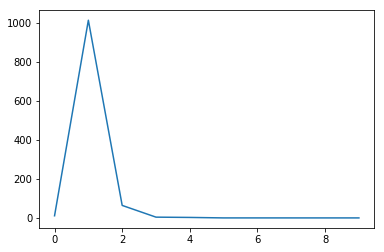

In [18]:
plt.plot(costs)

In [19]:
test_accuracy = sess.run([accuracy], feed_dict={x: X_test, y: Y_test})
print(test_accuracy)

[0.93000000000000005]
